In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import math
import scipy.stats as s
import pickle

In [2]:
data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [3]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
no_yes_dict = {"No":0,"Yes":1}
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)
data[data.columns[-1]] =data[data.columns[-1]].map(no_yes_dict)

In [5]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))

In [6]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [7]:
corr_matrix = data.corr()

In [8]:
corr_matrix

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


In [9]:
feature_selected_data = data[[data.columns[1],data.columns[2],
                             data.columns[3],data.columns[7],
                             data.columns[8],data.columns[9]]]

In [10]:
feature_selected_data.head()

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0


In [11]:
placement_equals_1_prior = data[data[data.columns[-1]] == 1].shape[0]/data.shape[0]

123789### 

In [12]:
placement_equals_1_prior

0.1659

In [13]:
placement_equals_0_prior = (1 - placement_equals_1_prior)


<Axes: >

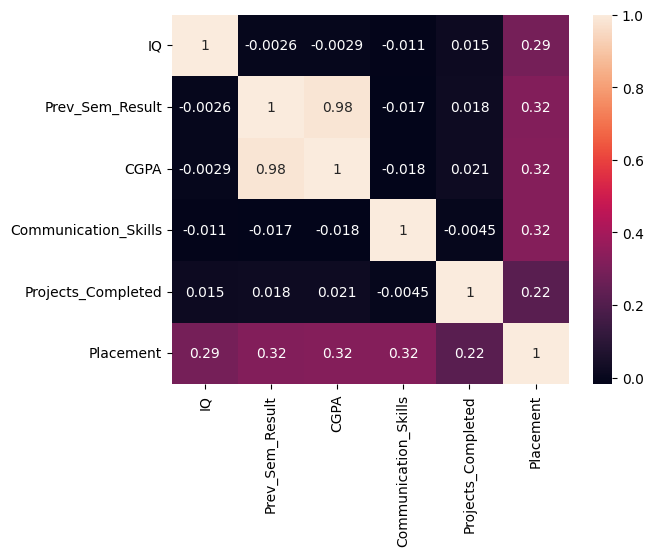

In [14]:
sns.heatmap(feature_selected_data.corr(),annot=True)

placement are not input features it is target feature

placement will be y and the five input features will be x

<Axes: >

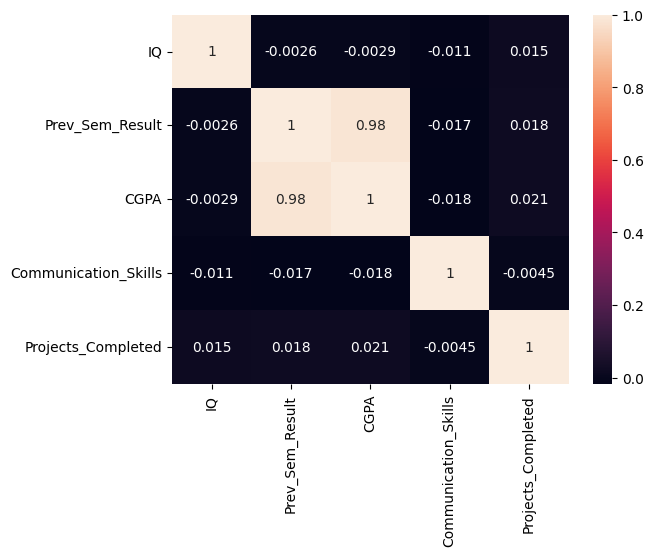

In [15]:
sns.heatmap(feature_selected_data.iloc[:,0:-1].corr(),annot=True)

In [16]:
X = np.array(feature_selected_data.iloc[:,0:-1])
cov_mat = np.cov(X,rowvar=False)
F = np.linalg.svd(cov_mat)


In [17]:
E = F[0]
lamda = F[1]
new_X = np.matmul(X,F[0])
new_cov_mat = np.cov(new_X,rowvar=False)

In [18]:
new_input_features = pd.DataFrame(data=new_X,
                            columns=["Input_feat_1", "Input_feat_2","Input_feat_3",
                                     "Input_feat_4","Input_feat_5"])

In [19]:
new_input_features

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179
...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777


<Axes: >

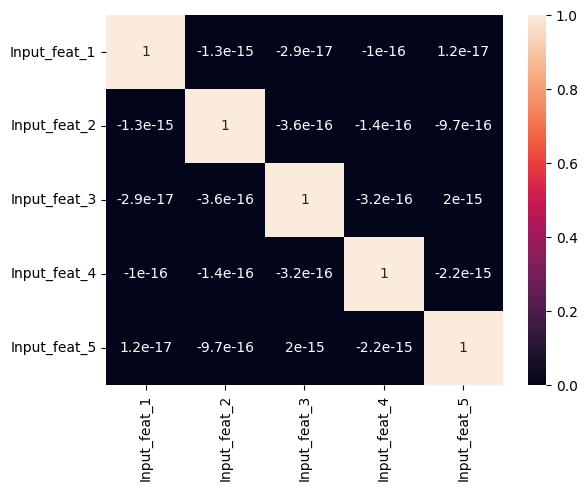

In [20]:
sns.heatmap(new_input_features.corr(),annot=True)

In [21]:
new_data = pd.concat([new_input_features,feature_selected_data[data.columns[-1]]],
                     axis=1)

In [22]:
new_data

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5,Placement
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328,0
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169,0
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885,0
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325,0
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179,0
...,...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895,1
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127,0
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864,0
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777,0


(array([  3.,  22., 101., 362., 572., 236., 208., 109.,  38.,   8.]),
 array([-157.98374855, -147.7834374 , -137.58312626, -127.38281511,
        -117.18250397, -106.98219282,  -96.78188168,  -86.58157053,
         -76.38125939,  -66.18094824,  -55.98063709]),
 <BarContainer object of 10 artists>)

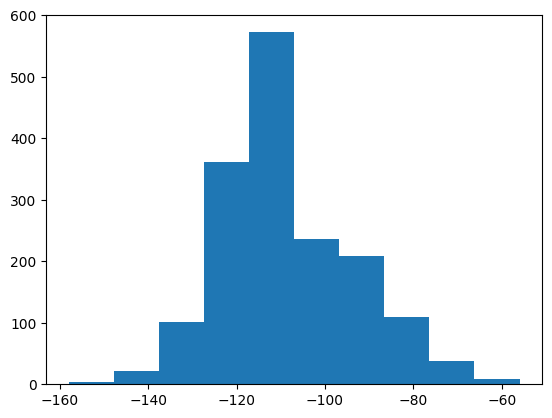

In [23]:
plt.hist(new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]])

In [24]:
new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]]

6      -122.981852
7      -110.996007
18      -85.982336
20     -120.993575
23      -77.976418
           ...    
9964   -122.993803
9978    -83.981477
9992   -108.977394
9994   -116.992906
9995   -118.977579
Name: Input_feat_1, Length: 1659, dtype: float64

In [25]:
class GaussianMLEstimatorNN(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.mu = torch.nn.Parameter(data=torch.tensor([-90.0]))
        self.log_sigma = torch.nn.Parameter(data=torch.tensor([1.0]))

    def forward(self,x):

        g = -self.mu
        h = (x + g)
        i = h**2
        sigma = torch.exp(self.log_sigma)
        j = (-1/(2*sigma**2))*i
        k = torch.exp(j)
        l = (1/(math.sqrt(2*math.pi)*sigma))*k
        f = torch.log(l)

        return -torch.mean(f)

In [26]:
def determine_accurate_params_values(input_feature_name,category):

    MLEstimatorNN = GaussianMLEstimatorNN()
    optimizer = torch.optim.SGD(params=MLEstimatorNN.parameters(),lr=0.01)
    x = torch.tensor(new_data[new_data[new_data.columns[-1]] == category][input_feature_name].values)
    tol = 10**(-4)
    model_parameters = list()

    epoch = 0
    while True:

        initial_loss_function_value = MLEstimatorNN(x)
        optimizer.zero_grad()
        initial_loss_function_value.backward()
        optimizer.step()
        final_loss_function_value = MLEstimatorNN(x)

        if torch.abs(initial_loss_function_value - final_loss_function_value) < tol:
            break

        epoch += 1

        print("The value of the Gaussian NLL after Epoch # {} is {}".format(epoch,initial_loss_function_value.item()))

    for param in MLEstimatorNN.parameters():
        model_parameters.append(param.detach().numpy().item())

    return model_parameters

In [27]:
likelihood_distribution_params = {0:dict(),1:dict()}

for category in new_data[new_data.columns[-1]].unique():
    for input_feat in new_data.columns[0:-1]:

        likelihood_distribution_params[category][input_feat] = determine_accurate_params_values(input_feat,category)

The value of the Gaussian NLL after Epoch # 1 is 19.53453266419029
The value of the Gaussian NLL after Epoch # 2 is 11.139190737881119
The value of the Gaussian NLL after Epoch # 3 is 8.776901253777323
The value of the Gaussian NLL after Epoch # 4 is 7.568725457406403
The value of the Gaussian NLL after Epoch # 5 is 6.827199194490666
The value of the Gaussian NLL after Epoch # 6 is 6.325270339655314
The value of the Gaussian NLL after Epoch # 7 is 5.96363749255501
The value of the Gaussian NLL after Epoch # 8 is 5.6914570826061315
The value of the Gaussian NLL after Epoch # 9 is 5.479855019936426
The value of the Gaussian NLL after Epoch # 10 is 5.311171884663877
The value of the Gaussian NLL after Epoch # 11 is 5.173983806621237
The value of the Gaussian NLL after Epoch # 12 is 5.060570118950541
The value of the Gaussian NLL after Epoch # 13 is 4.965524191077648
The value of the Gaussian NLL after Epoch # 14 is 4.884946600129523
The value of the Gaussian NLL after Epoch # 15 is 4.8159

In [28]:
likelihood_distribution_params

{0: {'Input_feat_1': [-90.08445739746094, 2.7348194122314453],
  'Input_feat_2': [-89.87162780761719, 4.492064952850342],
  'Input_feat_3': [-89.87816619873047, 4.424007892608643],
  'Input_feat_4': [-89.86354064941406, 4.567917823791504],
  'Input_feat_5': [-89.86554718017578, 4.548132419586182]},
 1: {'Input_feat_1': [-90.10704803466797, 3.148482084274292],
  'Input_feat_2': [-89.8745346069336, 4.461546421051025],
  'Input_feat_3': [-89.88035583496094, 4.399790287017822],
  'Input_feat_4': [-89.86246490478516, 4.577634811401367],
  'Input_feat_5': [-89.86555480957031, 4.548458099365234]}}

In [29]:
with open("likelihood_distribution_params.pkl", "wb") as file_handle:
    pickle.dump(likelihood_distribution_params,file_handle)

both are the ways to name our coulmns

In [30]:
np.save("eigen_vectors.npy",E)

In [31]:
def determine_placement_posterior_probability(input_features):

    input_features = np.array(input_features)
    input_features = input_features.reshape(1,input_features.shape[0])
    eig_vectors = np.load("eigen_vectors.npy")
    new_input_features = np.matmul(input_features,eig_vectors)

    placement_equals_1_likelihood = 1.0
    placement_equals_0_likelihood = 1.0

    with open("likelihood_distribution_params.pkl","rb") as file_handle:
        likelihood_distribution_params = pickle.load(file_handle)

    for input_feat, input_feat_value in zip(new_data.columns[0:-1], new_input_features):
        mu_0, sigma_0 = likelihood_distribution_params[0][input_feat]
        mu_1, sigma_1 = likelihood_distribution_params[1][input_feat]
        
        p_input_feature_on_0_placement = s.norm.pdf(input_feat_value,mu_0,sigma_0)
        p_input_feature_on_1_placement = s.norm.pdf(input_feat_value,mu_1,sigma_1)

        placement_equals_0_likelihood = placement_equals_0_likelihood * p_input_feature_on_0_placement
        placement_equals_1_likelihood = placement_equals_1_likelihood * p_input_feature_on_1_placement

    placement_equals_0_posterior = placement_equals_0_likelihood * placement_equals_0_prior
    placement_equals_1_posterior = placement_equals_1_likelihood * placement_equals_1_prior

    if placement_equals_1_posterior[0] > placement_equals_0_posterior[0]:
        return {"result":"Given your inputs, most likeliy you are going to get placed and the probability of you getting placed is roughly {}".format(placement_equals_1_posterior)}
    else:
        return {"result":"Given your inputs, most likely you are not going to get placed and the probability of you getting placed is roughly {}".format(placement_equals_1_posterior)}
    

In [32]:
new_data

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5,Placement
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328,0
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169,0
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885,0
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325,0
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179,0
...,...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895,1
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127,0
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864,0
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777,0


In [33]:
determine_placement_posterior_probability([100,5.87,6.93,6,4])

{'result': 'Given your inputs, most likely you are not going to get placed and the probability of you getting placed is roughly [1.52472317e-004 1.76615389e-157 6.31908010e-145 9.84761919e-194\n 6.12133295e-183]'}

step 2: we are going to assume that all the values in the data are I.I.D (INDEPENDENT AND IDENTICALLY DISTRIBUTED) ...  ...
P(input_feature1 =

REST API



In [34]:
NEW_DATA_INPUT_FEATURE_NAMES = ["Input_feat_1","Input_feat_3","Input_feat_4","Input_feat_5"]
PLACEMENT_EQUALS_ONE_PRIOR =0.1649

whenever we have to make a file as a module we always have to make a __init__.py file thi sfile will always be blank and no one will use it 

In [35]:
from fastapi import FastAPI, Query
from typing import Annotated
from pydantic import BaseModel




def determine_placement_posterior_probability(input_features):

    input_features = np.array(input_features)
    input_features = input_features.reshape(1,input_features.shape[0])
    eig_vectors = np.load("eigen_vectors.npy")
    new_input_features = np.matmul(input_features,eig_vectors)

    placement_equals_1_likelihood = 1.0
    placement_equals_0_likelihood = 1.0

    with open("likelihood_distribution_params.pkl","rb") as file_handle:
        likelihood_distribution_params = pickle.load(file_handle)

    for input_feat, input_feat_value in zip(NEW_DATA_INPUT_FEATURE_NAMES, new_input_features):
        mu_0, sigma_0 = likelihood_distribution_params[0][input_feat]
        mu_1, sigma_1 = likelihood_distribution_params[1][input_feat]
        
        p_input_feature_on_0_placement = s.norm.pdf(input_feat_value,mu_0,sigma_0)
        p_input_feature_on_1_placement = s.norm.pdf(input_feat_value,mu_1,sigma_1)

        placement_equals_0_likelihood = placement_equals_0_likelihood * p_input_feature_on_0_placement
        placement_equals_1_likelihood = placement_equals_1_likelihood * p_input_feature_on_1_placement

    placement_equals_0_posterior = placement_equals_0_likelihood * (1-PLACEMENT_EQUALS_ONE_PRIOR)
    placement_equals_1_posterior = placement_equals_1_likelihood * PLACEMENT_EQUALS_ONE_PRIOR

    if placement_equals_1_posterior[0] > placement_equals_0_posterior[0]:
        return {"result":"Given your inputs, most likeliy you are going to get placed and the probability of you getting placed is roughly {}".format(placement_equals_1_posterior[0])}
    else:
        return {"result":"Given your inputs, most likely you are not going to get placed and the probability of you getting placed is roughly {}".format(placement_equals_1_posterior[0])}

class InputFeatureVector(BaseModel):
    iq: Annotated[int,Query(ge=40, le=160)]
    previous_semester_result :Annotated[float,Query(ge=0, le=10)]
    cgpa: Annotated[float,Query(ge=0, le=10)]
    communication_skills: Annotated[int, Query(ge=0, le=10)]
    projects_completed :Annotated [int, Query(ge=0, le=10)]

app =FastAPI()


@app.get("/")
def home_page():

    return "THIS WEB API TELLS THE PROBABILITY OF A STUDENT GETIING PLACED BASED ON HIS OR HER IQ, PREVIOUS SEMESTER RESULT, CGPA, PROJECTS COMPLETED, COMMUNICATION SKILLS"


@app.post("/compute-probability")
def compute_probability(input_features : InputFeatureVector):

    pass 